In [1]:
import os
import h5py
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

from cmcrameri import cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import os
import h5py

In [22]:
def get_spectrum(signal):
    mean_deviated_signal = signal - np.mean(signal)

    SignalLength = len(signal)

    StartTime, EndTime = 0, 600
    TimeVector = np.linspace(StartTime, EndTime, SignalLength)

    DeltaTime = 0.5
    SamplingFrequency = 1 / DeltaTime

    # NUMBER OF FFT POINTS
    nFFT = 2 ** np.ceil(np.log2(SignalLength*4)).astype(int)

    Frequency = SamplingFrequency * np.arange(nFFT // 2 + 1) / nFFT

    # CALCULATE FAST-FOURIER-TRANSFORM AND POWER SPECTRAL DENSITY
    FFTofX = np.fft.fft(signal-np.mean(signal), nFFT)
    PowerSpectralDensity = np.abs(FFTofX[0:nFFT // 2 + 1] / nFFT) ** 2
    
    return Frequency, PowerSpectralDensity

def get_spectrum(signal):
    """
    Calculate the Power Spectral Density (PSD) of a signal.
    
    Parameters:
    signal (np.ndarray): Input signal.
    delta_time (float): Time difference between consecutive samples.
    
    Returns:
    tuple: Frequencies and Power Spectral Density.
    """
    delta_time = 0.1
    # Remove mean to center the signal
    mean_deviated_signal = signal - np.mean(signal)
    
    # Length of the signal
    signal_length = len(mean_deviated_signal)
    
    # Sampling frequency
    sampling_frequency = 1 / delta_time
    
    # Number of FFT points (zero-padded to next power of 2 for performance)
    nFFT = 2 ** np.ceil(np.log2(signal_length * 4)).astype(int)
    
    # Frequency vector
    frequencies = sampling_frequency * np.arange(nFFT // 2 + 1) / nFFT
    
    # Calculate FFT and Power Spectral Density
    fft_values = np.fft.fft(mean_deviated_signal, nFFT)
    psd = np.abs(fft_values[:nFFT // 2 + 1]) ** 2 / (sampling_frequency * signal_length)
    
    return frequencies, psd

In [66]:
Trs = ["NC", 0.4, 0.8, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 1.9, 2.0, 2.3, 2.5, 2.7, 2.9, 3.5, 
    4]

for i, Tr in enumerate(Trs):
    
    if os.path.isfile("/Volumes/ThermalAmp/NewDataSeries/Tr{}.csv".format(Tr)):
        
        pdf = pd.read_csv("/Volumes/ThermalAmp/NewDataSeries/Tr{}.csv".format(Tr))
        
        pFrequency, pPowerSpectralDensity = get_spectrum(pdf.plumeT.to_numpy())
        vFrequency, vPowerSpectralDensity = get_spectrum(pdf.vortT.to_numpy())
        
        upFrequency, upPowerSpectralDensity = get_spectrum(pdf.plumeU.to_numpy())
        uvFrequency, uvPowerSpectralDensity = get_spectrum(pdf.vortU.to_numpy())
        
        vpFrequency, vpPowerSpectralDensity = get_spectrum(pdf.plumeV.to_numpy())
        vvFrequency, vvPowerSpectralDensity = get_spectrum(pdf.vortV.to_numpy())
        
        pdd = pd.DataFrame(np.column_stack((
            pFrequency, pPowerSpectralDensity,
            vFrequency, vPowerSpectralDensity,
            upFrequency, upPowerSpectralDensity,
            uvFrequency, uvPowerSpectralDensity,
            vpFrequency, vpPowerSpectralDensity,
            vvFrequency, vvPowerSpectralDensity,
        )), columns = ['tpFreq', 'tpSpectra','tvFreq', 'tvSpectra', 'upFreq', 'upSpectra', 'uvFreq', 'uvSpectra',
                      'vpFreq', 'vpSpectra', 'vvFreq', 'vvSpectra'
                      ])
        
        pdd.to_csv("/Volumes/ThermalAmp/NewDataSeries/all_spectra_Tr{}.csv".format(Tr))

In [ ]:
tpFreq = []
tpSpectra = []
tvFreq = []
tvSpectra = []
upFreq = []
upSpectra = []
uvFreq = []
uvSpectra = []
vpFreq = []
vpSpectra = []
vvFreq = []
vvSpectra = []

Trs = ["NC", 0.4, 0.8, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 1.9, 2.0, 2.7, 2.9, 3.5, 4.0]

for i, Tr in enumerate(Trs):
    if os.path.isfile("/Volumes/ThermalAmp/DataSeries/all_spectra_Tr{}.csv".format(Tr)):
        pdf = pd.read_csv("/Volumes/ThermalAmp/DataSeries/all_spectra_Tr{}.csv".format(Tr))

        """
        tpFreq.append(pdf['tpFreq'].to_numpy())
        tpSpectra.append(pdf['tpSpectra'].to_numpy())
        tvFreq.append(pdf['tvFreq'].to_numpy())
        tvSpectra.append(pdf['tvSpectra'].to_numpy())
        upFreq.append(pdf['upFreq'].to_numpy())
        upSpectra.append(pdf['upSpectra'].to_numpy())
        uvFreq.append(pdf['uvFreq'].to_numpy())
        uvSpectra.append(pdf['uvSpectra'].to_numpy())
        vpFreq.append(pdf['vpFreq'].to_numpy())
        vpSpectra.append(pdf['vpSpectra'].to_numpy())
        vvFreq.append(pdf['vvFreq'].to_numpy())
        vvSpectra.append(pdf['vvSpectra'].to_numpy())
        """
        

In [5]:

        
Trs = ["NC", 0.4, 0.8, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 1.9, 2.0, 2.7, 3.5, 4.0]
   

NC
0.4
0.8
1.0
1.1
1.2
1.3
1.4
1.6
1.8
1.9
2.0
2.3
2.5
2.7
2.9
3.5
4


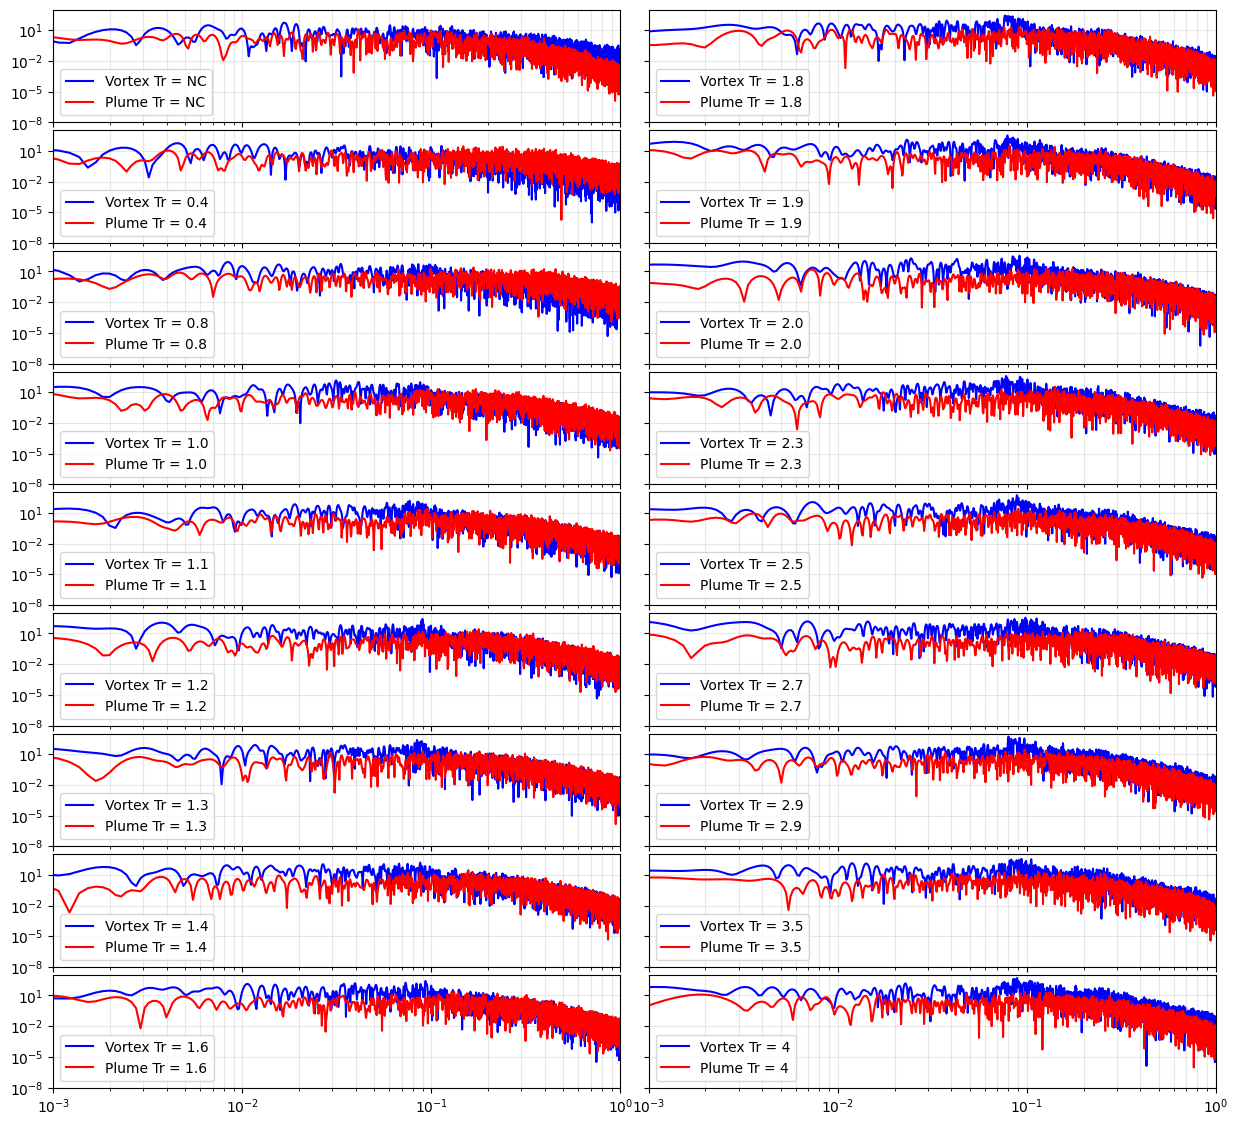

In [67]:
from matplotlib.ticker import MaxNLocator

        
Trs = ["NC", 0.4, 0.8, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 1.9, 2.0,2.3, 2.5, 2.7, 2.9, 3.5, 4]
    
fig, axes = plt.subplots(9, 2, figsize=(15, 14))
fig.subplots_adjust(hspace=0.07, wspace=0.05)  # Adjust space between plots

nrows, ncols = 9, 2
reordered_axes = [axes[r, c] for c in range(ncols) for r in range(nrows)]

yposs = np.arange(0.1, -0.1, -0.05)
for i, ax in enumerate(reordered_axes):
    
    if os.path.isfile("/Volumes/ThermalAmp/NewDataSeries/all_spectra_Tr{}.csv".format(Trs[i])):
        print(Trs[i])
        pdf = pd.read_csv("/Volumes/ThermalAmp/NewDataSeries/all_spectra_Tr{}.csv".format(Trs[i]))
    
        ax.plot(pdf['tvFreq'].to_numpy(), pdf['tvSpectra'].to_numpy(), label="Vortex Tr = {}".format(Trs[i]), color='b')
        
        ax.plot(pdf['tpFreq'].to_numpy(), pdf['tpSpectra'].to_numpy(), label="Plume Tr = {}".format(Trs[i]), color='r')
        ax.set_xscale('log')
        ax.set_yscale('log')
        
        ax.set_ylim([1e-8, 1e3])
        ax.set_xlim([1e-3, 1])
        
        if i not in [8, 17]:
            ax.set_xticklabels([])

        if i > 8:
            ax.set_yticklabels([])
        
        ax.legend()
        ax.grid(alpha=0.3, which='both')

#ax.remove()

NC
0.4
0.8
1.0
1.1
1.2
1.3
1.4
1.6
1.8
1.9
2.0
2.3
2.5
2.7
2.9
3.5
4


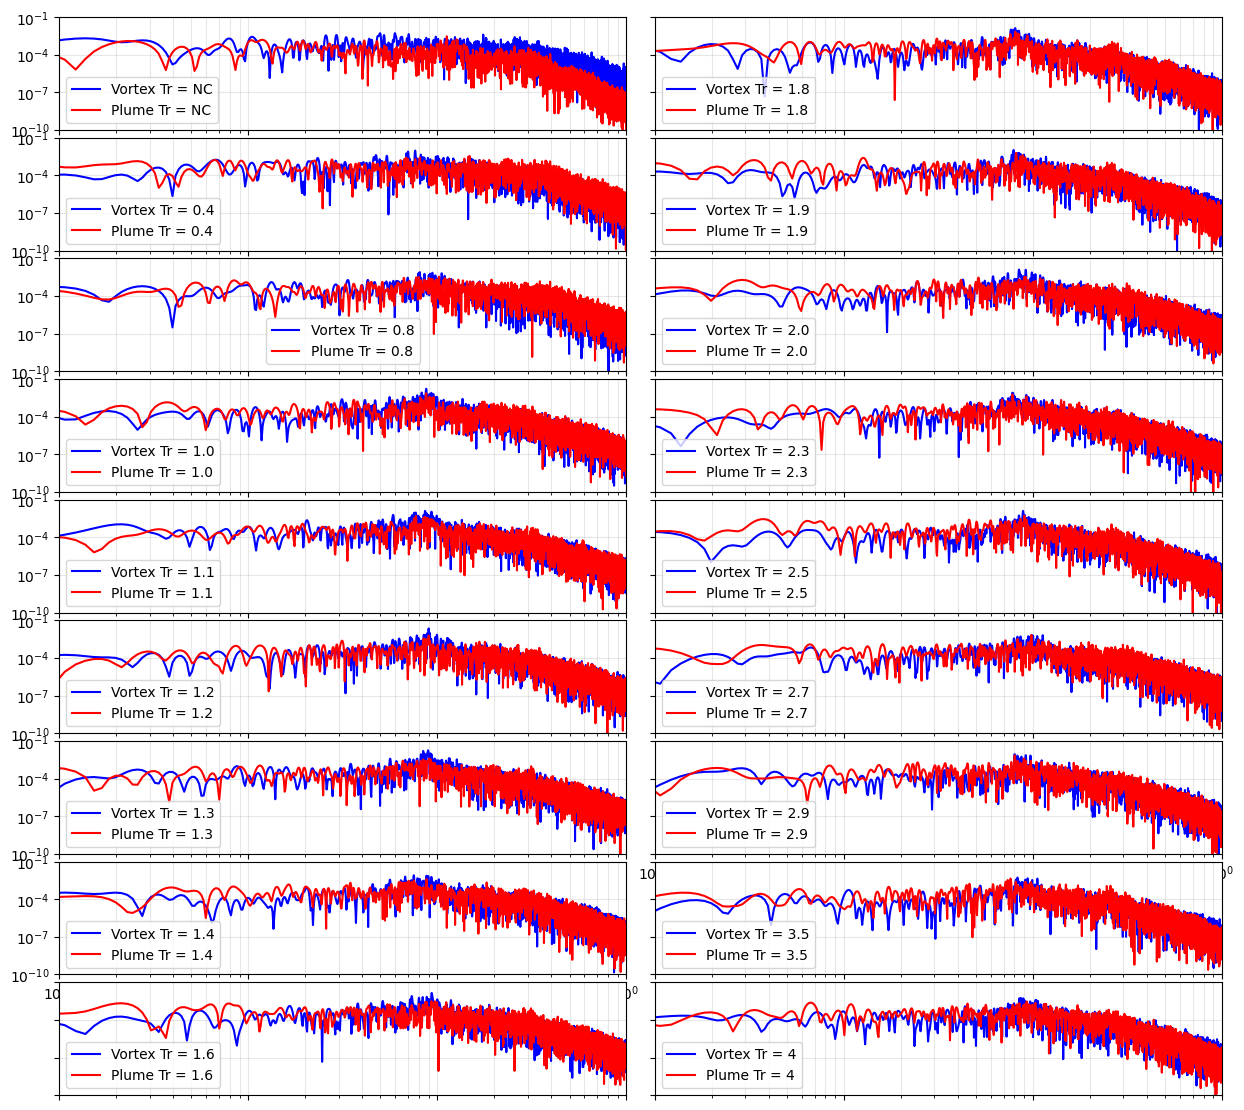

In [68]:
nrows, ncols = 7, 2

fig, axes = plt.subplots(9, 2, figsize=(15, 14))
fig.subplots_adjust(hspace=0.07, wspace=0.05)  # Adjust space between plots

nrows, ncols = 9, 2
reordered_axes = [axes[r, c] for c in range(ncols) for r in range(nrows)]

    
yposs = np.arange(0.1, -0.1, -0.05)
for i, ax in enumerate(reordered_axes):
    
    if os.path.isfile("/Volumes/ThermalAmp/NewDataSeries/all_spectra_Tr{}.csv".format(Trs[i])):
        print(Trs[i])
        pdf = pd.read_csv("/Volumes/ThermalAmp/NewDataSeries/all_spectra_Tr{}.csv".format(Trs[i]))
    
        ax.plot(pdf['uvFreq'].to_numpy(), pdf['uvSpectra'].to_numpy(), label="Vortex Tr = {}".format(Trs[i]), color='b')
        ax.plot(pdf['upFreq'].to_numpy(), pdf['upSpectra'].to_numpy(), label="Plume Tr = {}".format(Trs[i]), color='r')
        
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylim([1e-10, 1e-1])
        ax.set_xlim([1e-3, 1])
        
        if i not in [7, 15]:
            ax.set_xticklabels([])

        if i > 7:
            ax.set_yticklabels([])

        ax.legend()
        ax.grid(alpha=0.3, which='both')

NC
0.4
0.8
1.0
1.1
1.2
1.3
1.4
1.6
1.8
1.9
2.0
2.3
2.5
2.7
2.9
3.5
4


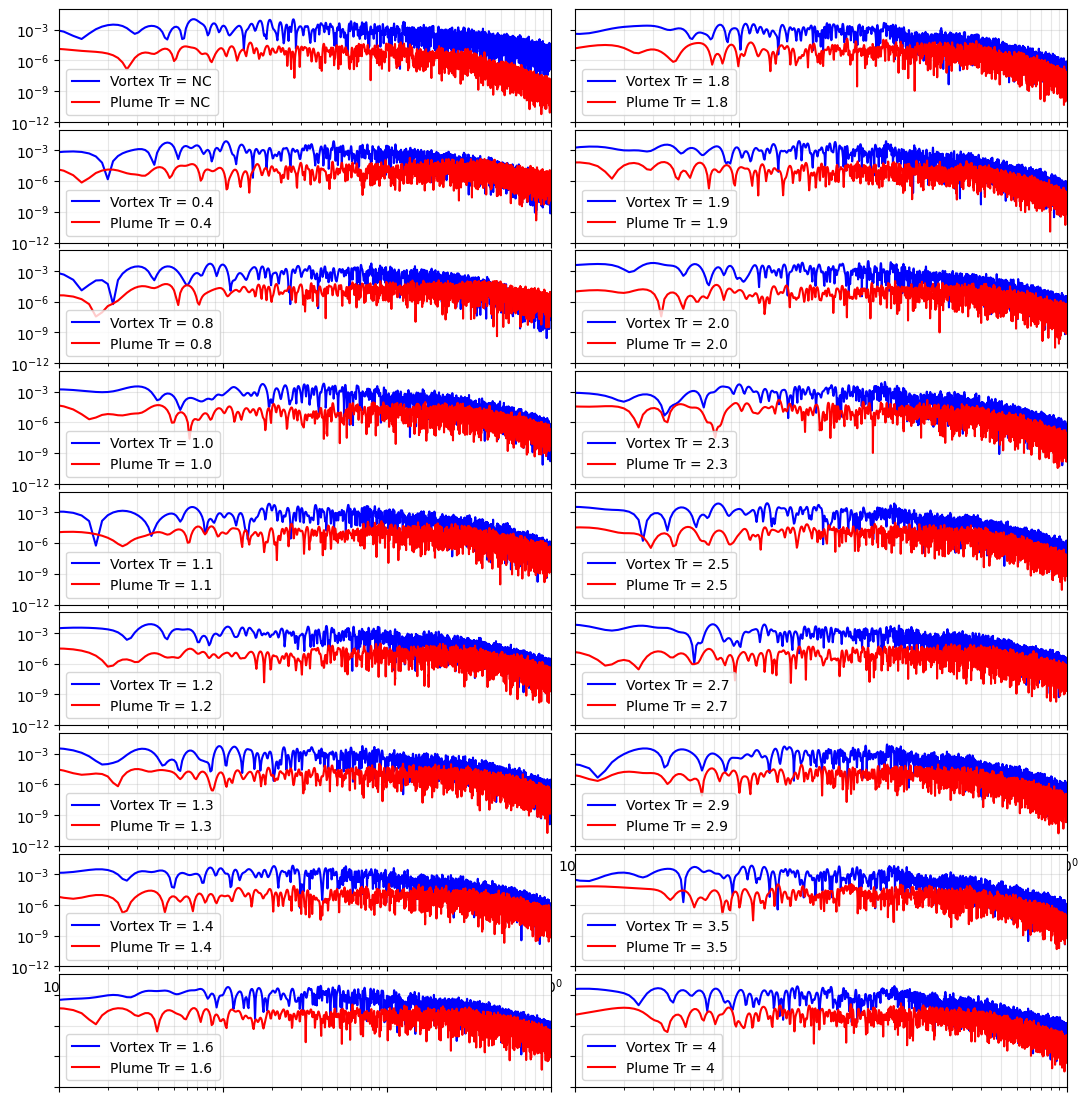

In [69]:
nrows, ncols = 7, 2

fig, axes = plt.subplots(9, 2, figsize=(13, 14))
fig.subplots_adjust(hspace=0.07, wspace=0.05)  # Adjust space between plots

nrows, ncols = 9, 2
reordered_axes = [axes[r, c] for c in range(ncols) for r in range(nrows)]

    
yposs = np.arange(0.1, -0.1, -0.05)
for i, ax in enumerate(reordered_axes):
    
    if os.path.isfile("/Volumes/ThermalAmp/NewDataSeries/all_spectra_Tr{}.csv".format(Trs[i])):
        print(Trs[i])
        pdf = pd.read_csv("/Volumes/ThermalAmp/NewDataSeries/all_spectra_Tr{}.csv".format(Trs[i]))
    
        ax.plot(pdf['vvFreq'].to_numpy(), pdf['vvSpectra'].to_numpy(), label="Vortex Tr = {}".format(Trs[i]), color='b')
        ax.plot(pdf['vpFreq'].to_numpy(), pdf['vpSpectra'].to_numpy(), label="Plume Tr = {}".format(Trs[i]), color='r')
        
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylim([1e-12, 1e-1])
        ax.set_xlim([1e-3, 1])
        
        if i not in [7, 15]:
            ax.set_xticklabels([])

        if i > 7:
            ax.set_yticklabels([])

        ax.legend()
        ax.grid(alpha=0.3, which='both')

NC 304.8182499129047 298.64591902329505
0.4 302.0100977939384 306.54719492454365
0.8 302.5528148164589 306.41068869121005
1.0 306.69233302625685 306.48939596762204
1.1 306.889302589348 307.1306086871251
1.2 306.7163639794887 307.8818197559322
1.3 306.7188562897513 308.3891440954095
1.4 306.70689482322854 309.3673598521463
1.6 306.85351997901085 310.18908882419765
1.8 302.6584157994306 306.3919548804576
1.9 303.0686523384035 306.61035518485454
2.0 306.7416418987666 312.5380074285988
2.7 306.7099649661633 316.0842654670837
3.5 304.91335515699114 306.41439223597547


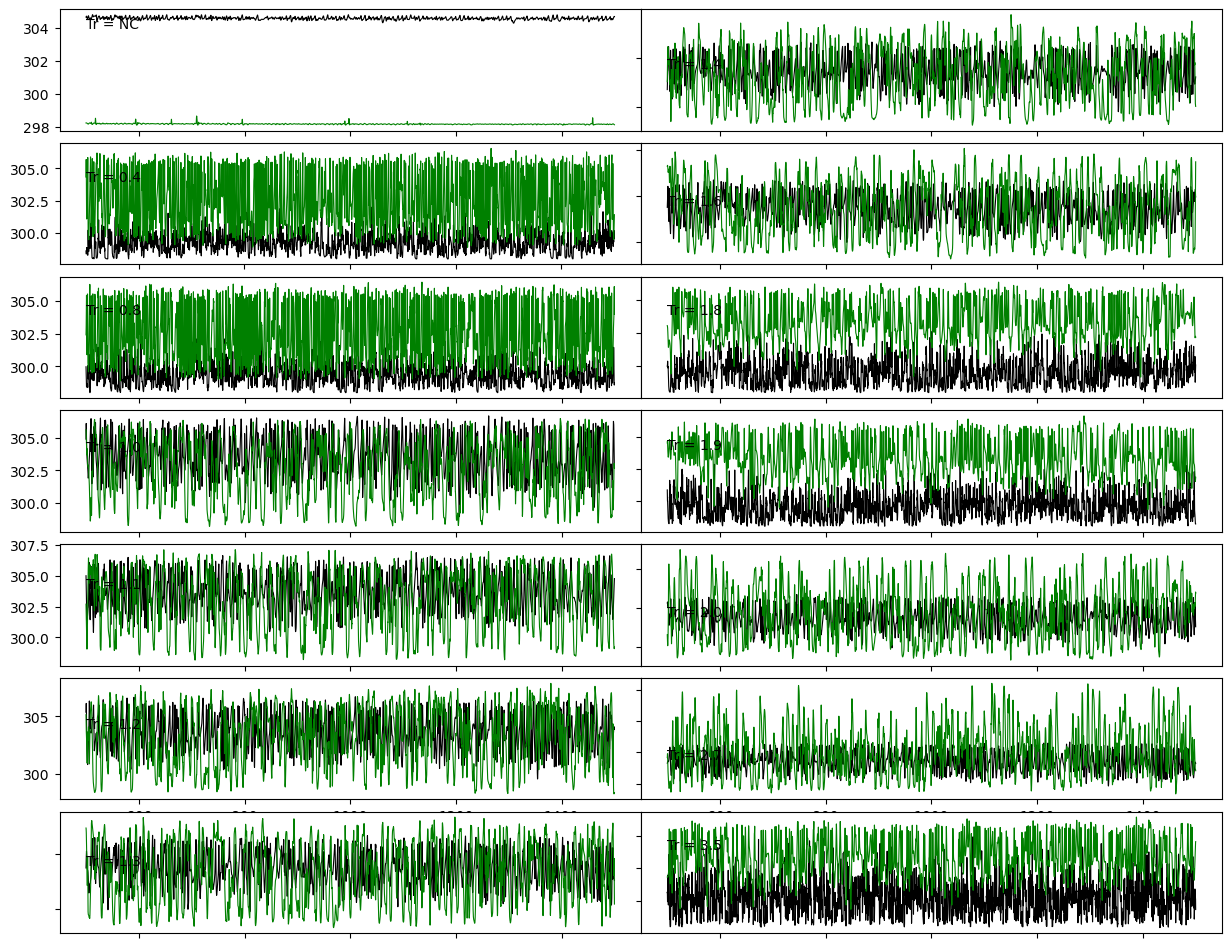

In [24]:
fig, axes = plt.subplots(7, 2, figsize=(15, 12))
#axes = axes.ravel()  # Flatten the 2D array to 1D for easy indexing
fig.subplots_adjust(hspace=0.1, wspace=0)  # Adjust space between plots

dcases = ["NC", 0.4, 0.8, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 1.9, 2.0, 2.7, 3.5]

nrows, ncols = 7, 2
reordered_axes = [axes[r, c] for c in range(ncols) for r in range(nrows)]

yposs = np.arange(0.005, -0.1, -0.05)
for i, ax in enumerate(reordered_axes):
    
    dats = "/Volumes/ThermalAmp/DataSeries/Tr{}.csv".format(dcases[i])
    
    dat_pd = pd.read_csv(dats)
    
    plumeT = dat_pd['plumeT'].to_numpy()
    vortT = dat_pd['vortT'].to_numpy()
    flowt = dat_pd['flowt'].to_numpy()
    
    ax.plot(flowt, plumeT, label="Plumes", linewidth=0.8, color='k')
    ax.plot(flowt, vortT, label="Vortex", linewidth=0.8, color='g')
    
    print(dcases[i], max(plumeT), max(vortT))
    
    ax.text(500, 304, "Tr = {}".format(dcases[i]), color='k', fontsize=10, )

    if i not in [5, 12]:
        ax.set_xticklabels([])
    if i > 5:
        ax.set_yticklabels([])
